# White wine 

In [95]:
# importing neccessary libraries for ML model and parameter tuning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from zipfile import ZipFile
import os
import joblib

## Load data

In [96]:
path=r"C:\Users\OLASQUARE\Downloads\wine+quality.zip"
with ZipFile(path, 'r') as zip_ref:
    zip_ref.printdir()
data= pd

File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [97]:
with ZipFile(path) as zip_ref:
    with zip_ref.open("winequality-white.csv") as f:
        white_wine= pd.read_csv(f, sep=";")

In [98]:
# copy data
df=white_wine.copy()
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [99]:
# checking the data distribution (inspect)
df.describe().T.style.background_gradient(axis=0)


,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.000000,6.854788,0.843868,3.800000,6.300000,6.800000,7.300000,14.200000
volatile acidity,4898.000000,0.278241,0.100795,0.080000,0.210000,0.260000,0.320000,1.100000
citric acid,4898.000000,0.334192,0.121020,0.000000,0.270000,0.320000,0.390000,1.660000
residual sugar,4898.000000,6.391415,5.072058,0.600000,1.700000,5.200000,9.900000,65.800000
chlorides,4898.000000,0.045772,0.021848,0.009000,0.036000,0.043000,0.050000,0.346000
free sulfur dioxide,4898.000000,35.308085,17.007137,2.000000,23.000000,34.000000,46.000000,289.000000
total sulfur dioxide,4898.000000,138.360657,42.498065,9.000000,108.000000,134.000000,167.000000,440.000000
density,4898.000000,0.994027,0.002991,0.987110,0.991723,0.993740,0.996100,1.038980
pH,4898.000000,3.188267,0.151001,2.720000,3.090000,3.180000,3.280000,3.820000
sulphates,4898.000000,0.489847,0.114126,0.220000,0.410000,0.470000,0.550000,1.080000


## Check missing value

In [100]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [101]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

## Reclassify

In [102]:
df.replace({'quality':{9:"Best",8:"Best", 7:"Good",6:"Good",5:"Average",4:"Bad",3:"Bad"}}, inplace=True)

## Split (feataures and target)

In [103]:
X= df.drop(columns="quality")
y=df["quality"]

## Scalling

In [104]:
scale= MinMaxScaler(feature_range=(0,1))
X_scaled=scale.fit_transform(X)

## Splitting dataset

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=234,stratify=y,test_size=0.2)

## Modelling

In [106]:
models={
    'Logistic Regression': LogisticRegression(),
    'SVM': RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'K nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

Logistic Regression is in training section...
Logistic Regression Accuracy:0.71


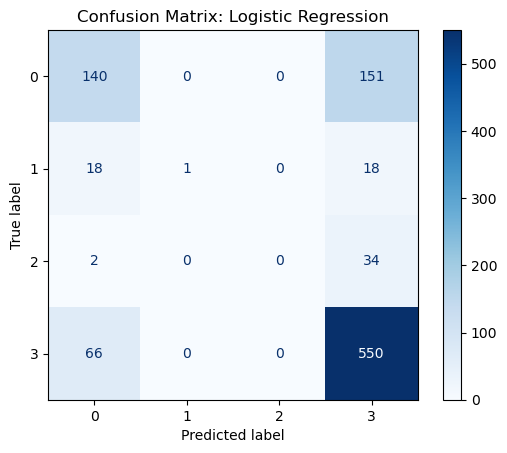

SVM is in training section...
SVM Accuracy:0.80


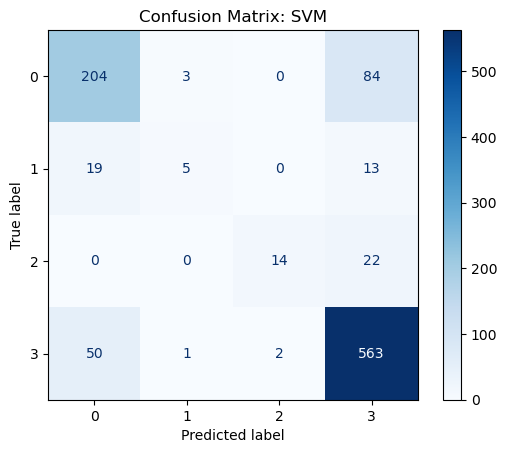

Decision Tree is in training section...
Decision Tree Accuracy:0.72


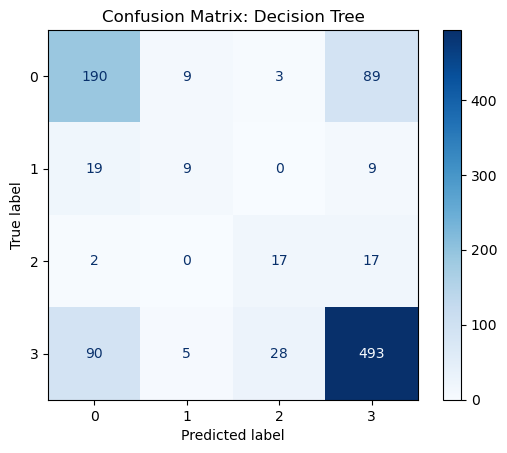

K nearest Neighbors is in training section...
K nearest Neighbors Accuracy:0.71


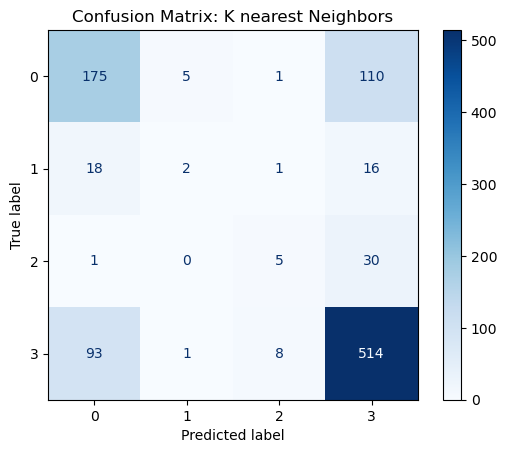

Naive Bayes is in training section...
Naive Bayes Accuracy:0.63


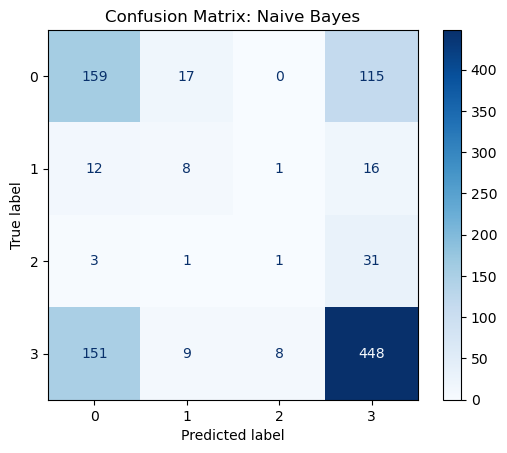

In [108]:
# initialize a dictionary to store the models results
results={}
for model_name, model in models.items():
    print(f"{model_name} is in training section...")
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    results[model_name]=accuracy
    print(f'{model_name} Accuracy:{accuracy:.2f}')

    # let add confusion matrix
    cm= confusion_matrix(y_test,y_pred)
    display= ConfusionMatrixDisplay(confusion_matrix=cm)

    # plot for visual and make the model name title
    display.plot(cmap="Blues")
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()